In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib
from sklearn.preprocessing import LabelEncoder
import joblib


In [ ]:
# Define the path to the Excel file
data=pd.read_csv('/content/vw_churndata.csv')
print(data.head())

  customer_id  gender  age married        state  number_of_referrals  \
0   19877-DEL    Male   35      No        Delhi                    7   
1   58353-MAH  Female   45     Yes  Maharashtra                   14   
2   25063-WES    Male   51      No  West Bengal                    4   
3   59787-KAR    Male   79      No    Karnataka                    3   
4   28544-TAM  Female   80      No   Tamil Nadu                    3   

   tenure_in_months value_deal phone_service multiple_lines  ...  \
0                27        NaN           Yes             No  ...   
1                13        NaN           Yes            Yes  ...   
2                35     Deal 5           Yes             No  ...   
3                21     Deal 4           Yes             No  ...   
4                 8        NaN           Yes             No  ...   

    payment_method monthly_charge total_charges total_refunds  \
0      Credit Card           65.6        593.30          0.00   
1      Credit Card          

In [ ]:
#Data Preprocessing
# Drop columns that won't be used for prediction
data = data.drop(['customer_id', 'churn_category', 'churn_reason'], axis=1)

# List of columns to be label encoded
columns_to_encode = ['gender', 'married', 'state', 'value_deal', 'phone_service', 'multiple_lines',
                     'internet_service', 'internet_type', 'online_security', 'online_backup',
                     'device_protection_plan', 'premium_support', 'streaming_tv', 'streaming_movies',
                     'streaming_music', 'unlimited_data', 'contract', 'paperless_billing',
                     'payment_method'
                    ]

In [ ]:
# Encode categorical variables except the target variable
label_encoders = {}
for column in columns_to_encode:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Manually encode the target variable 'Customer_Status'
data['customer_status'] = data['customer_status'].map({'Stayed': 0, 'Churned': 1})

In [ ]:
# Split data into features and target
X = data.drop('customer_status', axis=1)
y = data['customer_status']

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions
y_pred = rf_model.predict(X_test)

In [ ]:
# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[815  46]
 [120 221]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       861
           1       0.83      0.65      0.73       341

    accuracy                           0.86      1202
   macro avg       0.85      0.80      0.82      1202
weighted avg       0.86      0.86      0.86      1202



In [ ]:


# Feature Selection using Feature Importance

importances = rf_model.feature_importances_

indices = np.argsort(importances)[::-1]


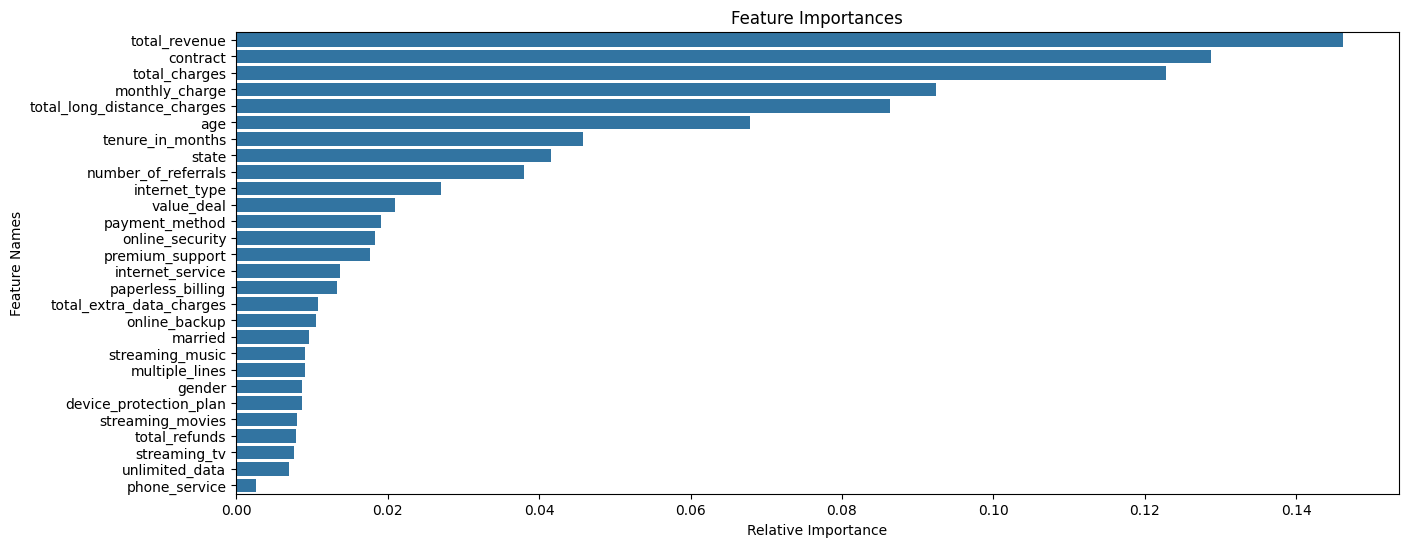

In [ ]:
# Plot the feature importances
plt.figure(figsize=(15, 6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Names')
plt.show()

In [ ]:
# Read the data from the specified sheet into a pandas DataFrame

new_data = pd.read_csv(r'/content/vw_joindata.csv')

# Display the first few rows of the fetched data
print(new_data.head())





  customer_id  gender  age married           state  number_of_referrals  \
0   93520-GUJ  Female   67      No         Gujarat                   13   
1   57256-BIH  Female   18      No           Bihar                    9   
2   72357-MAD  Female   53      No  Madhya Pradesh                   14   
3   66612-KAR  Female   58     Yes       Karnataka                   11   
4   22119-WES    Male   31     Yes     West Bengal                    5   

   tenure_in_months value_deal phone_service multiple_lines  ...  \
0                19     Deal 5           Yes            Yes  ...   
1                 7        NaN           Yes             No  ...   
2                12     Deal 5           Yes             No  ...   
3                18        NaN           Yes             No  ...   
4                 5        NaN           Yes             No  ...   

    payment_method monthly_charge total_charges total_refunds  \
0  Bank Withdrawal          72.10          72.1           0.0   
1      Cre

In [ ]:
# Retain the original DataFrame to preserve unencoded columns

original_data = new_data.copy()

# Retain the Customer_ID column

customer_ids = new_data['customer_id']

# Drop columns that won't be used for prediction in the encoded DataFrame

new_data = new_data.drop(['customer_id', 'customer_status', 'churn_category', 'churn_reason'], axis=1)

In [ ]:

# Encode categorical variables using the saved label encoders

for column in new_data.select_dtypes(include=['object']).columns:

    new_data[column] = label_encoders[column].transform(new_data[column])

In [ ]:


# Make predictions

new_predictions = rf_model.predict(new_data)


In [ ]:



# Add predictions to the original DataFrame

original_data['Customer_Status_Predicted'] = new_predictions




In [ ]:

# Filter the DataFrame to include only records predicted as "Churned"

original_data = original_data[original_data['Customer_Status_Predicted'] == 1]



In [ ]:
file_path = '/content/sample_data/Predictions.csv'
original_data.to_csv(file_path, index=False)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')